In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleaned/Training/Pituitary/image1_80.png
/kaggle/input/cleaned/Training/Pituitary/image1_930.png
/kaggle/input/cleaned/Training/Pituitary/image1_369.png
/kaggle/input/cleaned/Training/Pituitary/image1_39.png
/kaggle/input/cleaned/Training/Pituitary/image1_717.png
/kaggle/input/cleaned/Training/Pituitary/image1_622.png
/kaggle/input/cleaned/Training/Pituitary/image1_343.png
/kaggle/input/cleaned/Training/Pituitary/image1_891.png
/kaggle/input/cleaned/Training/Pituitary/image1_734.png
/kaggle/input/cleaned/Training/Pituitary/image1_738.png
/kaggle/input/cleaned/Training/Pituitary/image1_149.png
/kaggle/input/cleaned/Training/Pituitary/image1_526.png
/kaggle/input/cleaned/Training/Pituitary/image1_404.png
/kaggle/input/cleaned/Training/Pituitary/image1_111.png
/kaggle/input/cleaned/Training/Pituitary/image1_47.png
/kaggle/input/cleaned/Training/Pituitary/image1_162.png
/kaggle/input/cleaned/Training/Pituitary/image1_745.png
/kaggle/input/cleaned/Training/Pituitary/image1_763

In [4]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"

# Importing necessary libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import tqdm
import glob
import tensorflow 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.data.experimental import AUTOTUNE
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import RandomRotation, RandomZoom
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras import applications
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.io import imread, imshow
from skimage.transform import resize

from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, AUC,Recall
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.densenet import DenseNet169
import copy
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import cv2
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.resnet import ResNet50,preprocess_input
from tensorflow.keras.utils import image_dataset_from_directory

2024-05-08 16:20:36.700851: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 16:20:36.701009: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 16:20:36.830595: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
train_dir = '/kaggle/input/cleaned/Training/'
test_dir = '/kaggle/input/cleaned/Testing/'

train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    for image in os.listdir(train_dir+label):
        train_paths.append(train_dir+label+'/'+image)
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

In [7]:
test_paths = []
test_labels = []

for label in os.listdir(test_dir):
    for image in os.listdir(test_dir+label):
        test_paths.append(test_dir+label+'/'+image)
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

# Visualizing class distribution

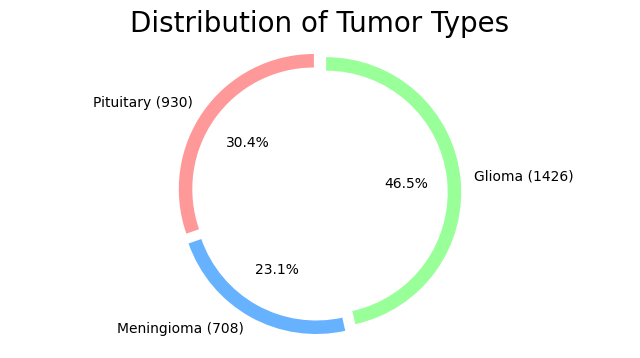

In [8]:
import matplotlib.pyplot as plt

# Combine train and test labels
all_labels = train_labels + test_labels

# Data
labels = ['Pituitary', 'Meningioma', 'Glioma']
total_sizes = [
    len([x for x in all_labels if x == 'Pituitary']),
    len([x for x in all_labels if x == 'Meningioma']),
    len([x for x in all_labels if x == 'Glioma'])
]

# Custom color palette for a brain tumor vibe
colors = ['#FF9999', '#66B2FF', '#99FF99']
explode = (0.05, 0.05, 0.05)

# Plotting
plt.figure(figsize=(8, 4))
plt.pie(total_sizes, labels=['{} ({})'.format(label, size) for label, size in zip(labels, total_sizes)], colors=colors, autopct='%1.1f%%', explode=explode, startangle=90, wedgeprops=dict(width=0.1))

# Title
plt.title('Distribution of Tumor Types', fontsize=20)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()

# Distribution of Data between Train and Test Sets

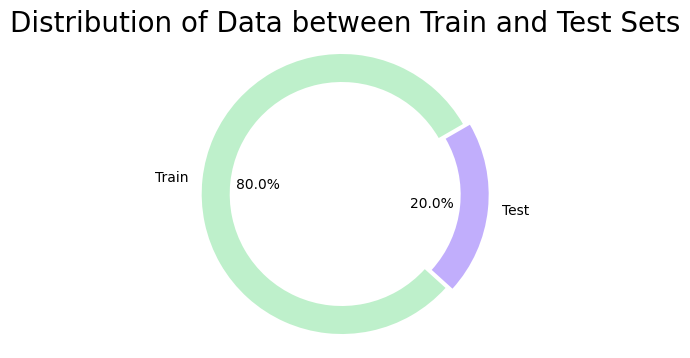

In [9]:
import matplotlib.pyplot as plt

# Data
labels = ['Train', 'Test']
sizes = [len(train_labels), len(test_labels)]
colors = ['#BEF0CB', '#C1AEFC']
explode = (0.05, 0)

# Plotting
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', explode=explode, startangle=30, wedgeprops=dict(width=0.2))

# Title
plt.title('Distribution of Data between Train and Test Sets', fontsize=20)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()


In [10]:
sizes = [
    len([x for x in train_labels if x == 'Pituitary']),
    len([x for x in train_labels if x == 'Meningioma']),
    len([x for x in train_labels if x == 'Glioma'])
]
sizes

[744, 566, 1140]

# Count of each class

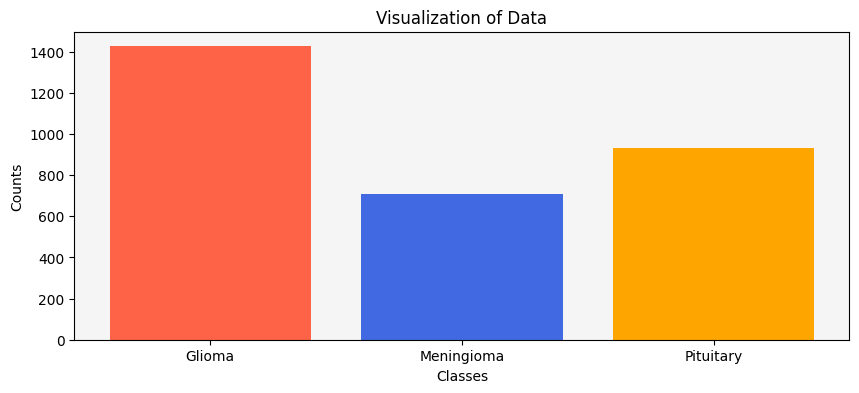

In [11]:
plt.figure(figsize=(10,4))
colors = ['#FF6347',  # Red for glioma
          '#4169E1',  # Blue for meningioma
          '#FFA500']  # Orange for pituitary
plt.bar(['Glioma','Meningioma','Pituitary'],[1426,708,930],color=colors)

plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Visualization of Data')
plt.gca().set_facecolor('#F5F5F5')
plt.show()

In [12]:
def train_df(tr_path):
    classes = []
    class_paths = []
    files = os.listdir(tr_path)
    for file in files:
        label_dir = os.path.join(tr_path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    tr_df = pd.concat([image_paths, image_classes], axis=1)
    return tr_df

In [13]:
def test_df(ts_path):
    classes = []
    class_paths = []
    files = os.listdir(ts_path)
    for file in files:
        label_dir = os.path.join(ts_path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    ts_df = pd.concat([image_paths, image_classes], axis=1)
    return ts_df

In [14]:
tr_df = train_df('/kaggle/input/cleaned/Training')
ts_df = test_df('/kaggle/input/cleaned/Testing/')

In [15]:
ts_df.head(1000)

,Class Path,Class
0,/kaggle/input/cleaned/Testing/Pituitary/image1...,Pituitary
1,/kaggle/input/cleaned/Testing/Pituitary/image1...,Pituitary
2,/kaggle/input/cleaned/Testing/Pituitary/image1...,Pituitary
3,/kaggle/input/cleaned/Testing/Pituitary/image1...,Pituitary
4,/kaggle/input/cleaned/Testing/Pituitary/image1...,Pituitary
...,...,...
609,/kaggle/input/cleaned/Testing/Glioma/image1_11...,Glioma
610,/kaggle/input/cleaned/Testing/Glioma/image1_37...,Glioma
611,/kaggle/input/cleaned/Testing/Glioma/image1_25...,Glioma
612,/kaggle/input/cleaned/Testing/Glioma/image1_10...,Glioma


# Creating validation dataset

In [16]:
train_df,valid_df = train_test_split(tr_df, train_size=.9, random_state=20)

# Data generators for Image Augmentation

In [17]:
image_size = (256, 256)

# Training batch size
batch_size = 32

SEED=1345

train_datagen=ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   brightness_range=(0.85, 1.15),
                                   width_shift_range=0.002,
                                   height_shift_range=0.002,
                                   shear_range=12.5,
                                   zoom_range=0,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode="nearest")

validation_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)


tr_gen = train_datagen.flow_from_dataframe(train_df, x_col='Class Path',
                                 y_col='Class',
                                 target_size=image_size,seed = SEED,
                                 batch_size=32,shuffle=True,
                                 class_mode ='categorical',)

valid_gen = validation_datagen.flow_from_dataframe(valid_df, x_col='Class Path',
                                    y_col='Class',
                                    target_size=image_size,seed = SEED,
                                    batch_size=32,
                                    class_mode ='categorical',)

ts_gen = test_datagen.flow_from_dataframe(ts_df, x_col='Class Path',
                                y_col='Class',
                                 target_size=image_size,shuffle=False,
                                 seed = SEED,
                                 batch_size=32,
                                 class_mode ='categorical',)

Found 2205 validated image filenames belonging to 3 classes.
Found 245 validated image filenames belonging to 3 classes.
Found 614 validated image filenames belonging to 3 classes.


# Visualizing Data

In [18]:
class_names=list(tr_gen.class_indices.keys())

In [19]:
class_names

['Glioma', 'Meningioma', 'Pituitary']

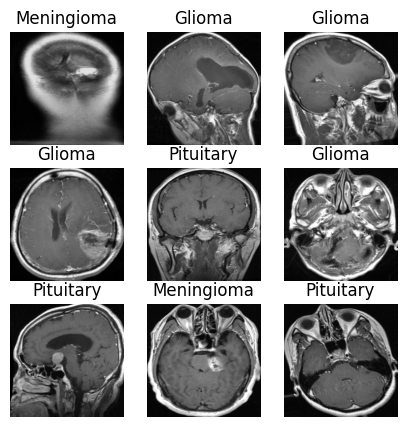

In [20]:
plt.figure(figsize=(5, 5))
for images, labels in tr_gen:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    break

# Model Creation InceptionResNetV2

In [21]:
image_size = (256,256,3)
# Create an instance of the InceptionResNetV2 model
InceptionResNetV2 = tf.keras.applications.InceptionResNetV2(
    include_top=False, weights="imagenet", input_shape=image_size, pooling=None
)

# Freeze the layers of the InceptionResNetV2 model
for layer in InceptionResNetV2.layers:
    layer.trainable = False

# Create a new model with additional layers
model = Sequential([
    InceptionResNetV2,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Add dropout layer with 50% dropout rate
    Dense(256, activation='relu'),
    Dropout(0.5),  # Add dropout layer with 50% dropout rate
    Dense(64, activation='relu'),
    Dropout(0.5),  # Add dropout layer with 50% dropout rate
    Dense(3, activation='softmax')  # Adjust the number of units based on your output classes
])
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall()
    ]
)

219055592/219055592 [==============================] - 2s 0us/step


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 6, 6, 1536)        54336736  
 ional)                                                          
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 batch_normalization_203 (B  (None, 1536)              6144      
 atchNormalization)                                              
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                        

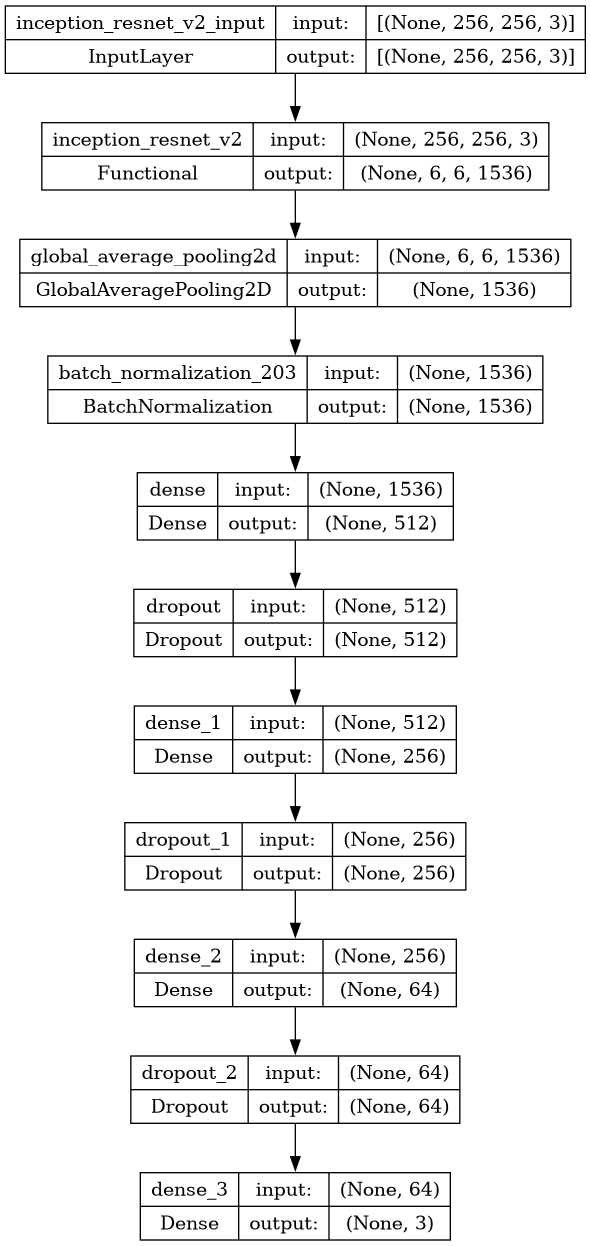

In [23]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='modelInceptionResNetV2_plot.png', show_shapes=True, show_layer_names=True)

In [24]:
steps_per_epoch = tr_gen.samples // 32
validation_steps = valid_gen.samples // 32
model_es = EarlyStopping(monitor='loss', min_delta=1e-9, patience=8, verbose=True)
model_rlr = ReduceLROnPlateau(monitor='val_accuracy',
                           mode='max', factor=0.3, patience=5, verbose=True)

# Training the model
history = model.fit(tr_gen,
                    steps_per_epoch=len(tr_gen),
                    epochs=20,verbose = 1,
                    validation_data=valid_gen,
                    validation_steps=validation_steps,
                    callbacks=[model_es, model_rlr])

Epoch 1/20


I0000 00:00:1715185381.478746     112 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


69/69 [==============================] - 211s 1s/step - loss: 1.0720 - accuracy: 0.6281 - auc: 0.8079 - precision: 0.6433 - recall: 0.5986 - val_loss: 0.6568 - val_accuracy: 0.7902 - val_auc: 0.9202 - val_precision: 0.8794 - val_recall: 0.5536 - lr: 0.0010
Epoch 2/20
69/69 [==============================] - 45s 648ms/step - loss: 0.7154 - accuracy: 0.7093 - auc: 0.8829 - precision: 0.7371 - recall: 0.6689 - val_loss: 0.5234 - val_accuracy: 0.8259 - val_auc: 0.9479 - val_precision: 0.8987 - val_recall: 0.6339 - lr: 0.0010
Epoch 3/20
69/69 [==============================] - 44s 642ms/step - loss: 0.6052 - accuracy: 0.7447 - auc: 0.9094 - precision: 0.7917 - recall: 0.7034 - val_loss: 0.4424 - val_accuracy: 0.8348 - val_auc: 0.9576 - val_precision: 0.8971 - val_recall: 0.7009 - lr: 0.0010
Epoch 4/20
69/69 [==============================] - 44s 634ms/step - loss: 0.5239 - accuracy: 0.7760 - auc: 0.9302 - precision: 0.8158 - recall: 0.7370 - val_loss: 0.4210 - val_accuracy: 0.8438 - val_auc

In [25]:
result = model.evaluate(ts_gen)
test_loss = result[0]
test_accuracy = result[1]
test_AUC = result[2]
test_pre = result[3]
test_rec = result[4]
print(f'Test Loss = {test_loss}')
print(f'Test Accuracy = {test_accuracy}')
print(f'Test AUC = {test_AUC}')
print(f'Test Precision = {test_pre}')
print(f'Test Recall = {test_rec}')

20/20 [==============================] - 9s 454ms/step - loss: 0.3117 - accuracy: 0.8746 - auc: 0.9735 - precision: 0.8857 - recall: 0.8583
Test Loss = 0.31166914105415344
Test Accuracy = 0.8745928406715393
Test AUC = 0.973535418510437
Test Precision = 0.8857142925262451
Test Recall = 0.8583061695098877


In [26]:
history.history['loss']

[1.0720313787460327,
 0.715368390083313,
 0.6051884889602661,
 0.5239129066467285,
 0.502627432346344,
 0.47513464093208313,
 0.41217371821403503,
 0.4169713258743286,
 0.3821521997451782,
 0.41068020462989807,
 0.3800313472747803,
 0.35524263978004456,
 0.3442651331424713,
 0.3256654739379883,
 0.323337197303772,
 0.29529869556427,
 0.3243252635002136,
 0.28460919857025146,
 0.3023056089878082,
 0.2718908190727234]

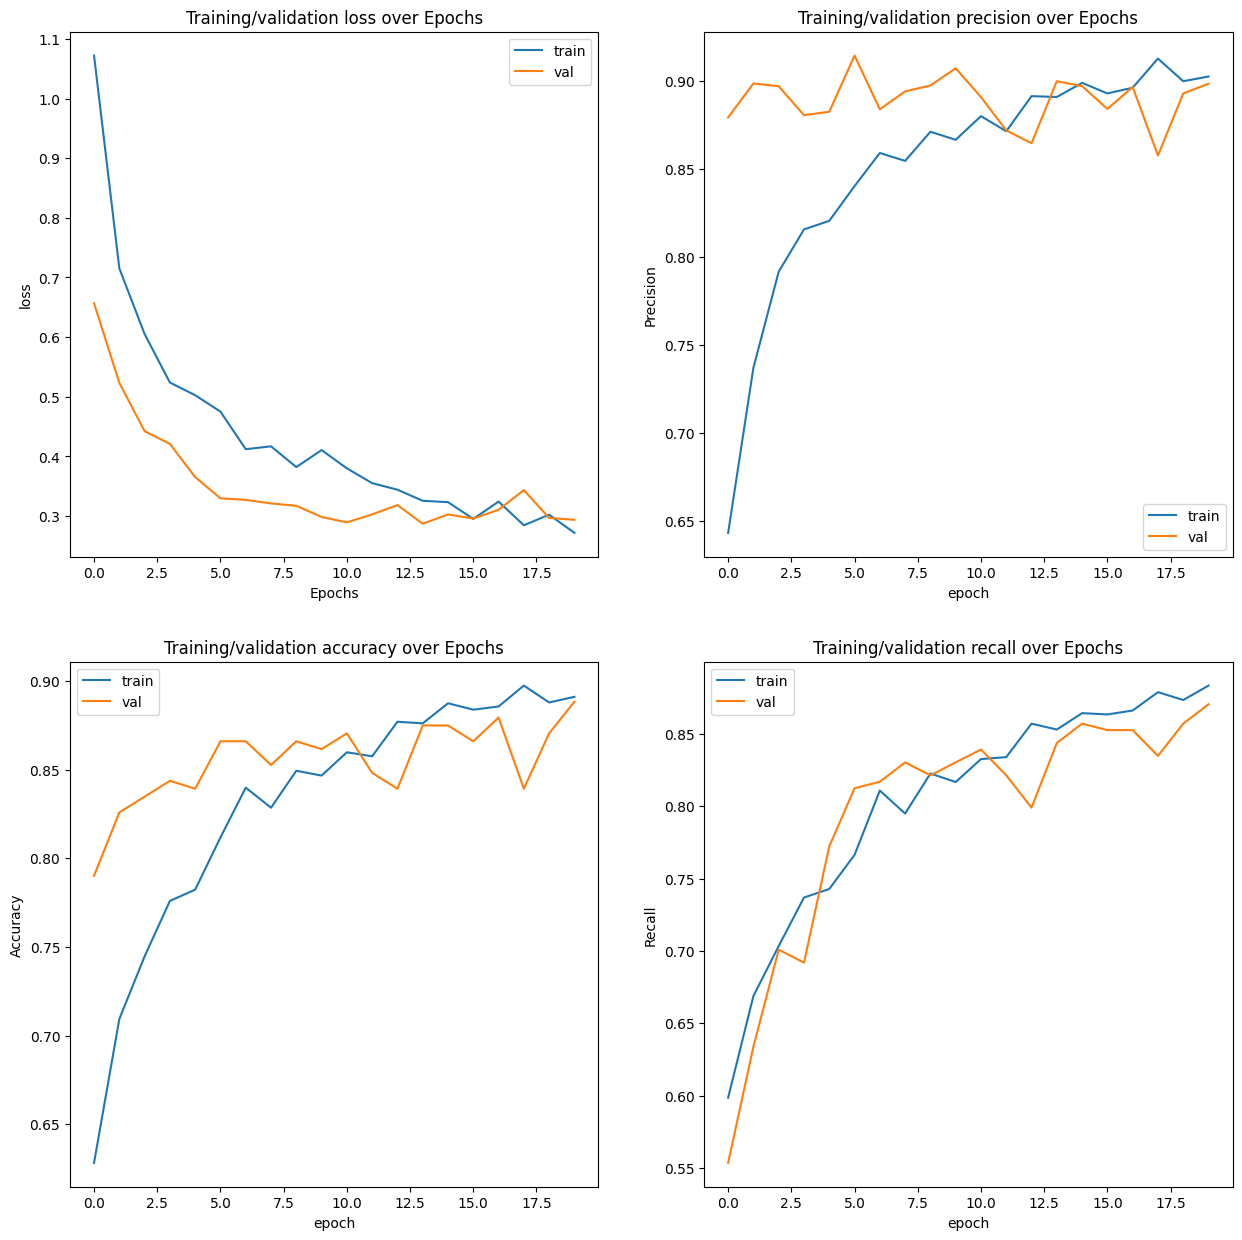

In [28]:
figure , axis = plt.subplots(2,2,figsize=(15,15))


axis[0,0].plot(history.history['loss'] , label='train')
axis[0,0].plot(history.history['val_loss'] , label='val')
axis[0,0].set_title('Training/validation loss over Epochs')
axis[0,0].set_xlabel('Epochs')
axis[0,0].set_ylabel('loss')
axis[0,0].legend()


axis[1,0].plot(history.history['accuracy'], label='train')
axis[1,0].plot(history.history['val_accuracy'], label='val')
axis[1,0].set_title('Training/validation accuracy over Epochs')
axis[1,0].set_xlabel('epoch')
axis[1,0].set_ylabel('Accuracy')
axis[1,0].legend()


axis[0,1].plot(history.history['precision'], label='train')
axis[0,1].plot(history.history['val_precision'], label='val')
axis[0,1].set_title('Training/validation precision over Epochs')
axis[0,1].set_xlabel('epoch')
axis[0,1].set_ylabel('Precision')
axis[0,1].legend()


axis[1,1].plot(history.history['recall'], label='train')
axis[1,1].plot(history.history['val_recall'], label='val')
axis[1,1].set_title('Training/validation recall over Epochs')
axis[1,1].set_xlabel('epoch')
axis[1,1].set_ylabel('Recall')
axis[1,1].legend()

# Test data predictions

In [29]:
test_label=ts_gen.classes
Y_pred=model.predict(ts_gen)
y_pred=[]
[y_pred.append(np.argmax(l)) for l in Y_pred ]

20/20 [==============================] - 37s 146ms/step


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [30]:
y_pred=np.array(y_pred)

# Confusion Matrix

<Figure size 800x600 with 0 Axes>

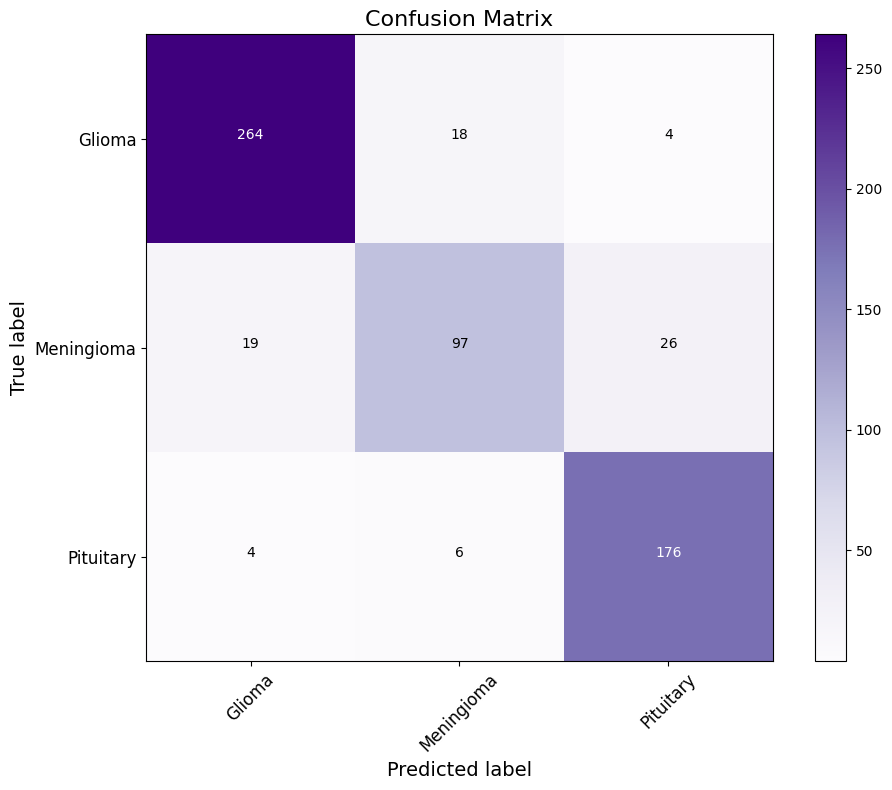

In [31]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes, cmap=plt.cm.Purples):
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix', fontsize=16)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)

    fmt = 'd'
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black",
                 fontsize=10)

    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.tight_layout()

# Example confusion matrix
cm = confusion_matrix(test_label, y_pred)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, class_names)
plt.show()


In [32]:
from sklearn.metrics import confusion_matrix, classification_report
# Compute the classification report
report = classification_report(test_label, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       286
           1       0.80      0.68      0.74       142
           2       0.85      0.95      0.90       186

    accuracy                           0.87       614
   macro avg       0.86      0.85      0.85       614
weighted avg       0.87      0.87      0.87       614



In [33]:
import pickle
pickle.dump(model, open('InceptionResNetV2', 'wb'))